<a href="https://colab.research.google.com/github/PedroMurta/Projetos-Data-Science/blob/master/Detec%C3%A7%C3%A3o_de_Fraudes_em_Cart%C3%B5es_de_Cr%C3%A9dito.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Detecção de Fraude em Cartão de Crédito
 ### O cartão de crédito é um dos meios de pagamento preferidos dos brasileiros  e, consequentemente, um dos caminhos mais visados para a realização de fraudes e golpes. Por isso, é preciso conhecer os diferentes tipos de fraude de cartão de crédito para evitar que aconteça com você.
 

<img src="https://w.wallhaven.cc/full/r2/wallhaven-r22pgw.jpg" />


 ### Muitos dos casos de golpes e fraudes de cartão de crédito são resultado de descuidos ou incidentes por parte dos usuários, se soubermos quais são os tipos de fraudes de cartão de crédito mais comuns, podemos nos prevernir.
 ### Tipos mais comuns de fraudes:
> * **Clonagem de cartão de crédito**
Um dos golpes mais comuns envolvendo cartão de crédito é a clonagem. Ela se tornou um crime tão corriqueiro que fica difícil listar todos os meios pelas quais é feita. 
Um dos métodos mais tradicionais envolve o uso dos skimmers, um pequeno artefato eletrônico inserido de forma clandestina nos leitores de cartão, tornando-os capazes de roubar dados dos clientes. Em compras pela internet também há o risco de dados serem roubados e utilizados de forma ilícita.

> * **Gerador de números falsos de cartões**
Outra forma de fraude comum é aquela que envolve geradores de números de cartões. Esses mecanismos geram milhões de combinações numéricas. Em algum momento, algumas dessas combinações resultam em um número de cartão de crédito válido, o que dá ao fraudador a chance de fazer compras utilizando-se dessa sequência.

> * **Ligações e mensagens falsas para roubo de dados( *Engenharia social* ).**
A Engenharia Social é a habilidade de conseguir acesso a informações confidenciais ou a áreas importantes de uma instituição através de habilidades de persuasão, muito usada por hackers. Com essas habilidades, o criminoso faz uma ligação para a vítima passando-se pelo banco e solicita ao cliente dados críticos, como número do cartão, código de segurança, CPF, etc... Se a pessoa cair no golpe, o criminoso consegue acesso ao cartão de crédito para fazer o que bem entender.

<img src="https://w.wallhaven.cc/full/6q/wallhaven-6qgmgq.jpg"/>

## O que as instituições financeiras podem fazer para ajudar a evitar fraude de cartão de crédito?
> **Investir na inteligência e análise de dados**
conhecer a fundo o histórico financeiro e os hábitos de compra de cada cliente. Dessa forma, fica mais fácil e assertivo identificar quais aquisições têm mais chances de serem resultado de uma fraude de cartão de crédito e, assim, bloqueá-las para que o usuário não se prejudique. Registros de acesso e protocolos de entregas também são informações cruciais que devem ser armazenadas. Dessa forma, torna-se possível construir o perfil de bons consumidores, de potenciais fraudadores ou daqueles que já tenham tentado uma fraude.


> ### Neste projeto, iremos avaliar uma base de dados e criaremos um algoritmo de machine learning para detectar com base nesses dados transações fraudulentas e transações legais.

# Importando os dados

A Base de dados desse projeto foram disponibilizados por algumas empresas européias de cartão de crédito. O dataset apresenta operações financeiras que aconteceram no período de dois dias, onde foram classificadas 492 fraudes em quase 290 mil transações.

[Na página original](https://www.kaggle.com/mlg-ulb/creditcardfraud) dos dados, também é informado que as variáveis passaram por uma transformação conhecida como Análise de Componentes Principais (Principal Component Analysis - PCA).

A PCA permite a redução da dimensionalidade enquanto mantém o maior número possível de informações. Para conseguir isso, o algoritmo encontra um conjunto novo de recursos - os chamados componentes.

Esses componentes são em número menor or igual às variáveis originais. No caso deste projeto, os componentes achados pela transformação da PCA são as próprias colunas  `[V1,V2,V3…,V28]` .

In [1]:
# importando as bibliotecas necessárias

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions, plot_confusion_matrix

%matplotlib inline

# Sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score, recall_score, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier
from imblearn.under_sampling import NearMiss

import warnings
warnings.filterwarnings("ignore")

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [2]:
# Carregando o nosso dataset
df = pd.read_csv("https://www.dropbox.com/s/b44o3t3ehmnx2b7/creditcard.csv?dl=1")
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


# Análise Exploratória dos Dados

Analisando as 5 primeiras entradas conseguimos ver que a transformação PCA deixou as *features* anônimas e em valores numéricos. 

Vemos também que a coluna `Time` e `Amount` foram preservadas, e nossa variável alvo está na coluna `Class`, onde 0 representa uma transação **válida** e 1 representa uma transação **fraudulenta**.

In [3]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,1.768627e-15,9.170318e-16,-1.810658e-15,1.693438e-15,1.479045e-15,3.482336e-15,1.392007e-15,-7.528491e-16,4.328772e-16,9.049732e-16,5.085503e-16,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


Verificando o resumo estatístico pelo método *describe()* que não há aparentemente nenhuma discrepância aparente.

Vamos analisar a coluna `Amount` e analisar os dados de transações válidas e fraudulentas. 

In [4]:
# Transações fraudulentas
df.Amount[df.Class == 1].describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [5]:
# Transações válidas
df.Amount[df.Class == 0].describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

Podemos ver uma enorme diferença de valores no dataset na contagem de transações válidas para as fraudulentas.

In [6]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

Não há valores faltantes no nosso dataset, então não precisamos nos preocupar com a etapa de limpeza. 

In [7]:

print(f'Valores de casos')
print(f'Transações Válidas: {round(df.Class.value_counts()[0] / len(df) * 100, 2)}%')
print(f'Transações Fraudulentas: {round(df.Class.value_counts()[1] / len(df) * 100, 2)}% do dataset')

Valores de casos
Transações Válidas: 99.83%
Transações Fraudulentas: 0.17% do dataset


A porcentagem de transações fraudulentas correspondem à 0.17% do nosso dataset. Esse desbalanceamento nos dados deve interferir no nosso modelo de classificação, por isso padronizaremos os dados a fim de evitar [overfitting](https://en.wikipedia.org/wiki/Overfitting). 

In [8]:
# Vericar quantidade de linhas e colunas
df.shape

(284807, 31)

[]

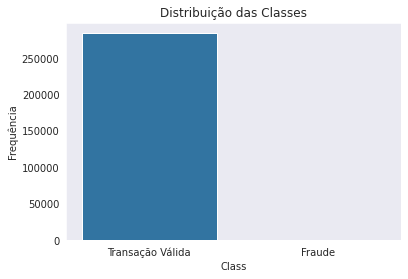

In [9]:
sns.set_style("dark")

fig, ax = plt.subplots()
sns.countplot('Class', data=df, ax=ax)
ax.set_title('Distribuição das Classes')
plt.xlabel("Class")
plt.xticks([0, 1], ['Transação Válida', 'Fraude'])
plt.ylabel("Frequência")
plt.plot()

Plotamos esse gráfico acima para analisarmos de forma visual a diferença entre as classes do nosso dataset.

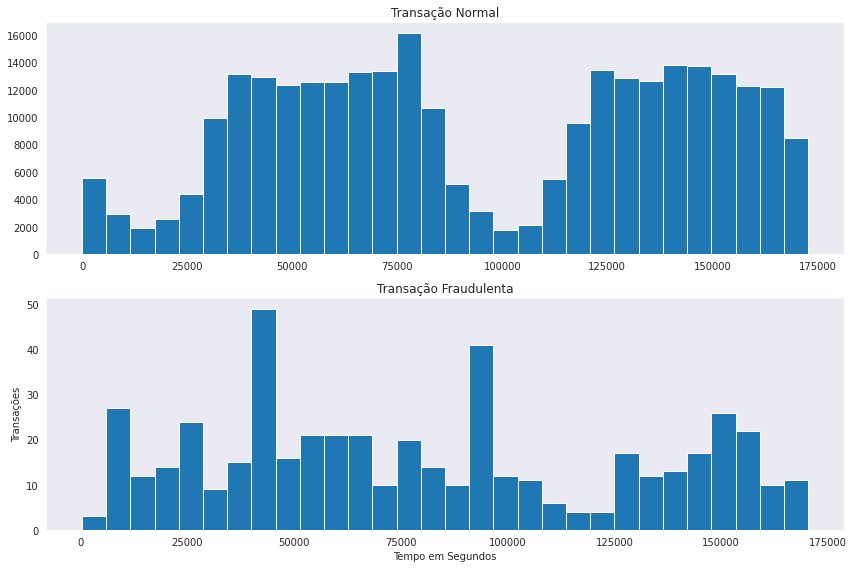

In [10]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(12, 8))

ax[0].hist(df.Time[df.Class == 0], bins=30) 
ax[0].set_title("Transação Normal") 

ax[1].hist(df.Time[df.Class == 1], bins=30)
ax[1].set_title("Transação Fraudulenta")

plt.ylabel('Transações')
plt.xlabel("Tempo em Segundos")
plt.tight_layout()

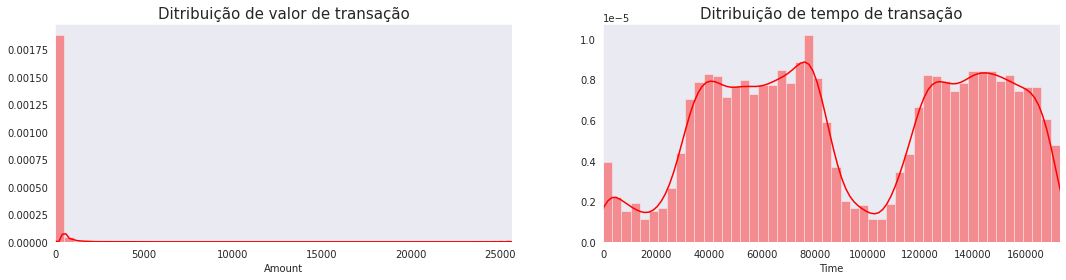

In [11]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(18, 4))

sns.distplot(df.Amount, ax=ax[0], color='red')
ax[0].set_title('Ditribuição de valor de transação', fontsize=15)
ax[0].set_xlim([min(df.Amount.values), max(df.Amount.values)])

sns.distplot(df.Time, ax=ax[1], color='red')
ax[1].set_title('Ditribuição de tempo de transação', fontsize=15)
ax[1].set_xlim([min(df.Time.values), max(df.Time.values)])
plt.show()

Plotamos também esses dois gráficos para comparar as distribuições das 2 classes ao longo do tempo, mas não identificamos nenhuma informação relevante.


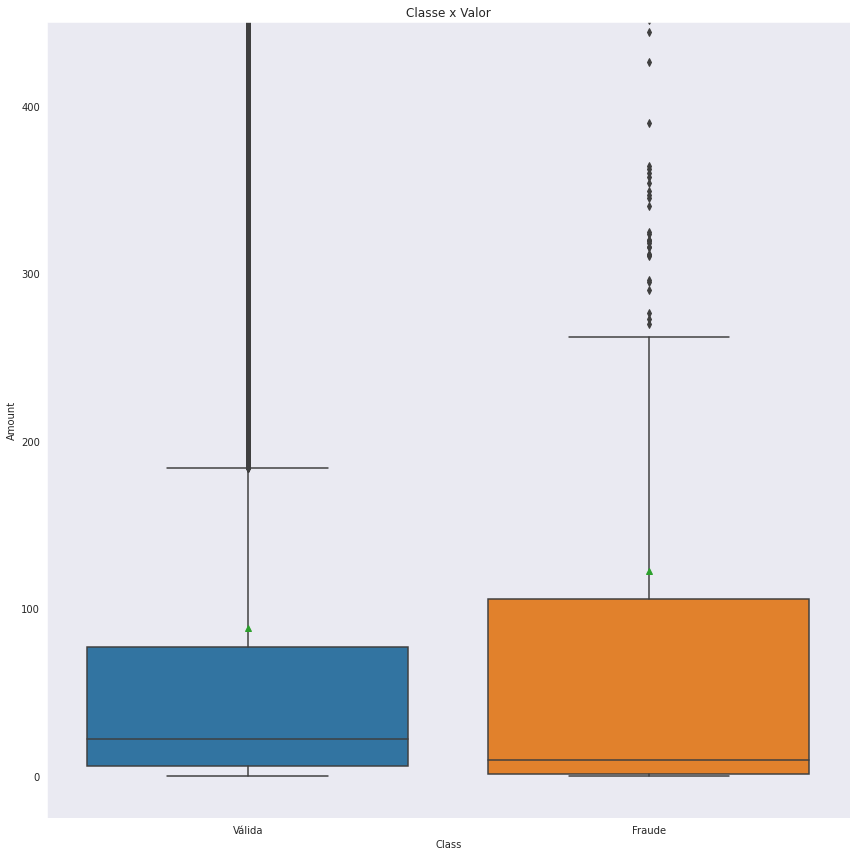

In [12]:
fig, ax = plt.subplots(figsize=(12, 12))

sns.boxplot(df.Class, df.Amount, ax=ax, showmeans=True)
plt.ylim(-25, 450)
plt.xticks([0, 1], ['Válida', 'Fraude'])
ax.set_title("Classe x Valor")

plt.tight_layout()

Seguindo nossa análise exploratória, plotamos os boxplots para procurar alguma diferença no padrão transações em relação à Amount. Vemos que há uma distribuição diferente para as duas classes.

# Preparando os dados
* Para que possamos trabalhar com os dados para usar nossos modelos de Machine Learning, iremos padronizar as *features* `Time` e `Amount`, dividir nossos dados em **treino** e **teste** e balancear os dados para evitar *overfitting*, como já citamos acima.

> Para padronizar as colunas **Time** e **Amount**, vamos usar a classe StandardScaler da biblioteca scikit-learn.

In [13]:
# Padronizar Colunas "Time" e "Amount"
df_clean = df.copy()

scaler = StandardScaler()
df_clean['normAmount'] = scaler.fit_transform(df_clean['Amount'].values.reshape(-1, 1))
df_clean['normTime'] = scaler.fit_transform(df_clean['Time'].values.reshape(-1, 1))

# Ver as entradas após alterações
df_clean.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class,normAmount,normTime
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0,0.244964,-1.996583
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0,-0.342475,-1.996583
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0,1.160686,-1.996562
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0,0.140534,-1.996562
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0,-0.073403,-1.996541


In [14]:
df_clean.drop(['Time', 'Amount'], axis=1, inplace=True)
df_clean.head(3)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class,normAmount,normTime
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.244964,-1.996583
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.342475,-1.996583
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.160686,-1.996562


## Tratando os dados

**Dividindo os dados em treino e teste**

Para garantir que nossos conjuntos de treino e teste tenham quantidade proporcionais de classes, passamos o parâmetro `stratify=y`.

In [15]:
# Separar X e y
X = df_clean.drop('Class', axis=1)
y = df_clean['Class']

# Dividir entre treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, shuffle=True)

O NearMiss iguala a quantidade de amostra entre as classes, é um método de *undersampling*.

In [16]:
# Aplicando o NearMiss
nr = NearMiss()
X, y = nr.fit_sample(X, y)

Existem parâmetros que podem ser configurados com o NearMiss, mas usaremos o padrão mesmo.

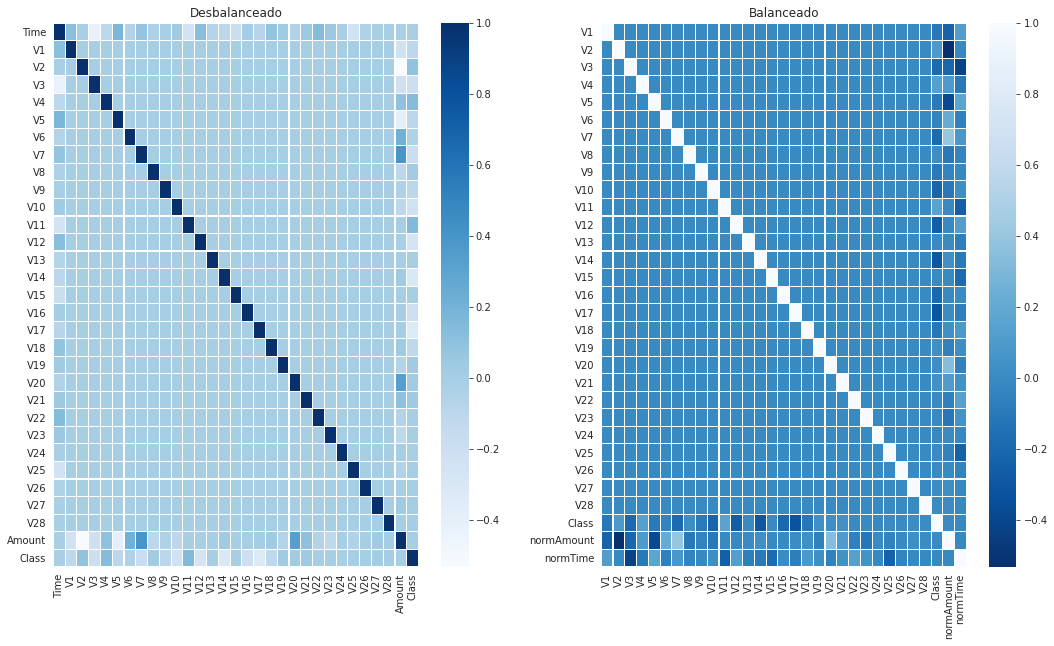

In [17]:
correlacao = df.corr()
correlacao2 = df_clean.corr()

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(18, 10))

sns.heatmap(correlacao, xticklabels=correlacao.columns, yticklabels=correlacao.columns,  linewidths=.1, cmap="Blues", ax=ax[0])
ax[0].set_title("Desbalanceado")

sns.heatmap(correlacao2, xticklabels=correlacao2.columns, yticklabels=correlacao2.columns,  linewidths=.1, cmap="Blues_r", ax=ax[1])
ax[1].set_title("Balanceado")


plt.show()

Agora com os dados balanceados, podemos verificar e identificar quais variáveis estão relacionadas. É possível notar que antes de balancear os dados não víamos nenhuma informação relevante, mas após o balanceamento, conseguimos tirar mais informações.

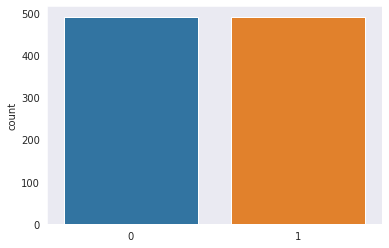

In [18]:
ax = sns.countplot(x=y)

Com esse simples gráfico conseguimos ver que agora não há uma difetença enorme entre as classes de transações válidas e fraudulentas.

#### Este problema de classificação de transação consiste em classificar transações como válidas ou fraudulentas, ou seja, é indicado usar modelos de machine learning usados para classificações.

## **Modelo de Regressão Logística**

> Serve para classificar algo dentro de um conjunto de categorias. Vamos usar esse modelo por que ele trabalha com probabilidades, no nosso caso, probabilidade de ser ou não fraude.

In [19]:
# Regressão Logística
rl = LogisticRegression(solver='liblinear').fit(X_train, y_train)

rl_pred = rl.predict(X_test)

In [48]:
print('Relatório de Classificação')
print(f'Classification Report:\n {classification_report(y_test, rl_pred)}')
print(f'Recall Score - Regressão Logística: {recall_score(y_test, rl_pred)}%')
print(f'F1 Score - Regressão Logística: {f1_score(y_test, rl_pred)}%')
print(f'Accuracy Score - Regressão Logística: {accuracy_score(y_test, rl_pred)}%')

Relatório de Classificação
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     71079
           1       0.88      0.59      0.70       123

    accuracy                           1.00     71202
   macro avg       0.94      0.79      0.85     71202
weighted avg       1.00      1.00      1.00     71202

Recall Score - Regressão Logística: 0.5853658536585366%
F1 Score - Regressão Logística: 0.7024390243902439%
Accuracy Score - Regressão Logística: 0.9991432824920649%


## **Modelo Árvore de Decisão**

É um algoritmo de Machine Learning supervisionado e pode ser usado para regressão e para **classificação**.

#### **Decision Tree Regressor**

In [21]:
dt = DecisionTreeRegressor().fit(X_train, y_train)

dt_pred = dt.predict(X_test)

In [47]:
print('Relatório de Classificação')
print(f'Classification Report:\n {classification_report(y_test, dt_pred)}')
print(f'Recall Score - Decision Tree Regressor: {recall_score(y_test, dt_pred)}%')
print(f'F1 Score - Decision Tree Regressor: {f1_score(y_test, dt_pred)}%')
print(f'Accuracy Score - Decision Tree Regressor: {accuracy_score(y_test, dt_pred)}%')

Relatório de Classificação
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     71079
           1       0.76      0.73      0.75       123

    accuracy                           1.00     71202
   macro avg       0.88      0.87      0.87     71202
weighted avg       1.00      1.00      1.00     71202

Recall Score - Decision Tree Regressor: 0.7317073170731707%
F1 Score - Decision Tree Regressor: 0.7468879668049793%
Accuracy Score - Decision Tree Regressor: 0.9991432824920649%


#### **Decision Tree Classifier**

In [23]:
dtc = DecisionTreeClassifier().fit(X_train, y_train)

dtc_pred = dtc.predict(X_test)

In [49]:
print('Relatório de Classificação')
print(f'Classification Report:\n {classification_report(y_test, dtc_pred)}')
print(f'Recall Score - Decision Tree Classifier: {recall_score(y_test, dtc_pred)}%')
print(f'F1 Score - Decision Tree Classifier: {f1_score(y_test, dtc_pred)}%')
print(f'Accuracy Score - Decision Tree Classifier: {accuracy_score(y_test, dtc_pred)}%')

Relatório de Classificação
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     71079
           1       0.77      0.75      0.76       123

    accuracy                           1.00     71202
   macro avg       0.88      0.87      0.88     71202
weighted avg       1.00      1.00      1.00     71202

Recall Score - Decision Tree Classifier: 0.7479674796747967%
F1 Score - Decision Tree Classifier: 0.757201646090535%
Accuracy Score - Decision Tree Classifier: 0.9991713715906857%


Com os modelos treinados e as previsões feitas, fizemos a avaliação do desempenho acima.

Neste tipo de problema ainda mais quando está desbalanceado, a acurácia não é uma métrica adequada. Observa-se a **matriz de confusão** para ver a taxa de acertos para transações fraudulentas, ou pela coluna recall do Relatório de Classificação.

## **Matriz de Confusão**

**Matriz de confusão do modelo Regressão Logística**

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71079
           1       0.88      0.59      0.70       123

    accuracy                           1.00     71202
   macro avg       0.94      0.79      0.85     71202
weighted avg       1.00      1.00      1.00     71202



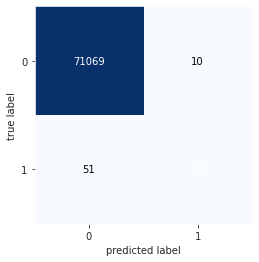

In [25]:
plot_confusion_matrix(confusion_matrix(y_test, rl_pred));
print(classification_report(y_test, rl_pred))

In [28]:
print(pd.crosstab(y_test, rl_pred, rownames=['Real'], colnames=['Predito'], margins=True))

Predito      0   1    All
Real                     
0        71069  10  71079
1           51  72    123
All      71120  82  71202


**Matriz de Confusão do Modelo Decision Tree Regressor**

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71079
           1       0.76      0.73      0.75       123

    accuracy                           1.00     71202
   macro avg       0.88      0.87      0.87     71202
weighted avg       1.00      1.00      1.00     71202



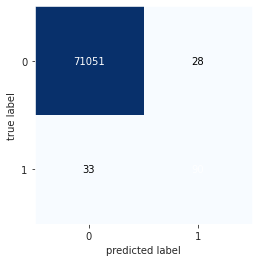

In [26]:
plot_confusion_matrix(confusion_matrix(y_test, dt_pred));
print(classification_report(y_test, dt_pred))

In [29]:
print(pd.crosstab(y_test, dt_pred, rownames=['Real'], colnames=['Predito'], margins=True))

Predito    0.0  1.0    All
Real                      
0        71051   28  71079
1           33   90    123
All      71084  118  71202


**Matriz de Confusão do modelo Decision Tree Classifier**

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71079
           1       0.77      0.75      0.76       123

    accuracy                           1.00     71202
   macro avg       0.88      0.87      0.88     71202
weighted avg       1.00      1.00      1.00     71202



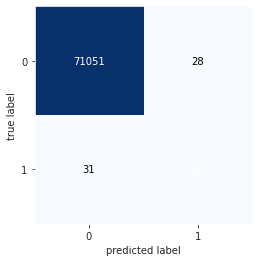

In [27]:
plot_confusion_matrix(confusion_matrix(y_test, dtc_pred));
print(classification_report(y_test, dtc_pred))

In [30]:
print(pd.crosstab(y_test, dtc_pred, rownames=['Real'], colnames=['Predito'], margins=True))

Predito      0    1    All
Real                      
0        71051   28  71079
1           31   92    123
All      71082  120  71202


**Analisando individualmente os Scores**

In [51]:
print('Recall Score')
print(f'Recall Score do Modelo de Regressão Logística: {round(recall_score(y_test, rl_pred), 5)}%')
print(f'Recall Score Modelo Decision Tree Regressor: {round(recall_score(y_test, dt_pred), 5)}%')
print(f'Recall Score Modelo Decision Tree Classifier: {round(recall_score(y_test, dtc_pred), 5)}%')

Recall Score
Recall Score do Modelo de Regressão Logística: 0.58537%
Recall Score Modelo Decision Tree Regressor: 0.73171%
Recall Score Modelo Decision Tree Classifier: 0.74797%


In [50]:
print('Acurácia Score')
print(f'Acurácia do Modelo de Regressão Logística: {round(accuracy_score(y_test, rl_pred), 5)}%')
print(f'Acurácia do Modelo Decision Tree Regressor: {round(accuracy_score(y_test, dt_pred), 5)}%')
print(f'Acurácia do Modelo Decision Tree Classifier: {round(accuracy_score(y_test, dtc_pred), 5)}%')

Acurácia Score
Acurácia do Modelo de Regressão Logística: 0.99914%
Acurácia do Modelo Decision Tree Regressor: 0.99914%
Acurácia do Modelo Decision Tree Classifier: 0.99917%


# **Conclusões**

> Como podemos observar, esse não é um problema tão simples. Os dados estão bem tratados, sem valores ausentes ou variáveis categóricas, mas o desbalanceamento e a transformação PCA demandam um trabalho considerável. 

> Apesar dos bons resultados finais, vale ainda testar outros algoritmos de *Classificação* e fazer um `tunning` de parâmetros.